# Assignment 2

**Assignment 2: Evolutionary Algorithms**

**Goal**: Implement an Evolutionary Algorithm to solve continuous and discrete problems.

* Part1: continuous problem that is concerned with finding minimum of functions, in this case, Sphere and Ackley
  functions.

* Part 2: discrete problem that is concerned with finding the solution for the N-queens problem. Could be defined as minimization or maximization.

For both parts, this assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve given problems.

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

**Setup**

**Install Prerequisites (Part 1 and 2)**

In [ ]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

**Imports (Part 1 and 2)**

In [4]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums
from typing import List, Tuple, Dict, Callable
import random
import math

# Set seed
np.random.seed(42)

**Jupyter Notebook Magic (Part 1 and 2)**

In [ ]:
# Enables inline matplotib graphs
%matplotlib inline

# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
# %matplotlib qt5
# %pip install PyQt5
# plt.ion()

## Part 1: Continuous Optimization (5 points total)

In this part of the assignment you will implement an Evolutionary Algorithm to find the minimum of the following functions: [Sphere](https://www.sfu.ca/~ssurjano/spheref.html) and [Ackley](https://www.sfu.ca/~ssurjano/ackley.html) functions.


**Function Definitions \& Plotting**

**Sphere Function**


In [ ]:
def Sphere(x):
    """source: https://www.sfu.ca/~ssurjano/spheref.html"""
    dimension = x.shape[0]
    return (1 / dimension) * (sum(x**2))



**Ackley Function**

In [ ]:
def Ackley(x):
    """source: https://www.sfu.ca/~ssurjano/ackley.html"""

    # Ackley function parameters
    a = 20
    b = 0.2
    c = 2 * np.pi
    dimension = len(x)

    # Individual terms
    term1 = -a * np.exp(-b * np.sqrt(sum(x**2) / dimension))
    term2 = -np.exp(sum(np.cos(c * xi) for xi in x) / dimension)
    return term1 + term2 + a + np.exp(1)

**Plotting**

In [ ]:
# Generate data for plotting
boundary_point, resolution = 5, 500
x = np.linspace(-boundary_point, boundary_point, resolution)
y = np.linspace(-boundary_point, boundary_point, resolution)

# Generate the coordinate points
X, Y = np.meshgrid(x, y)
positions = np.column_stack([X.ravel(), Y.ravel()])

# Get depths for all coordinate positions
z_unimodal = np.array(list(map(Sphere, positions))).reshape([resolution, resolution])
z_multimodal = np.array(list(map(Ackley, positions))).reshape([resolution, resolution])

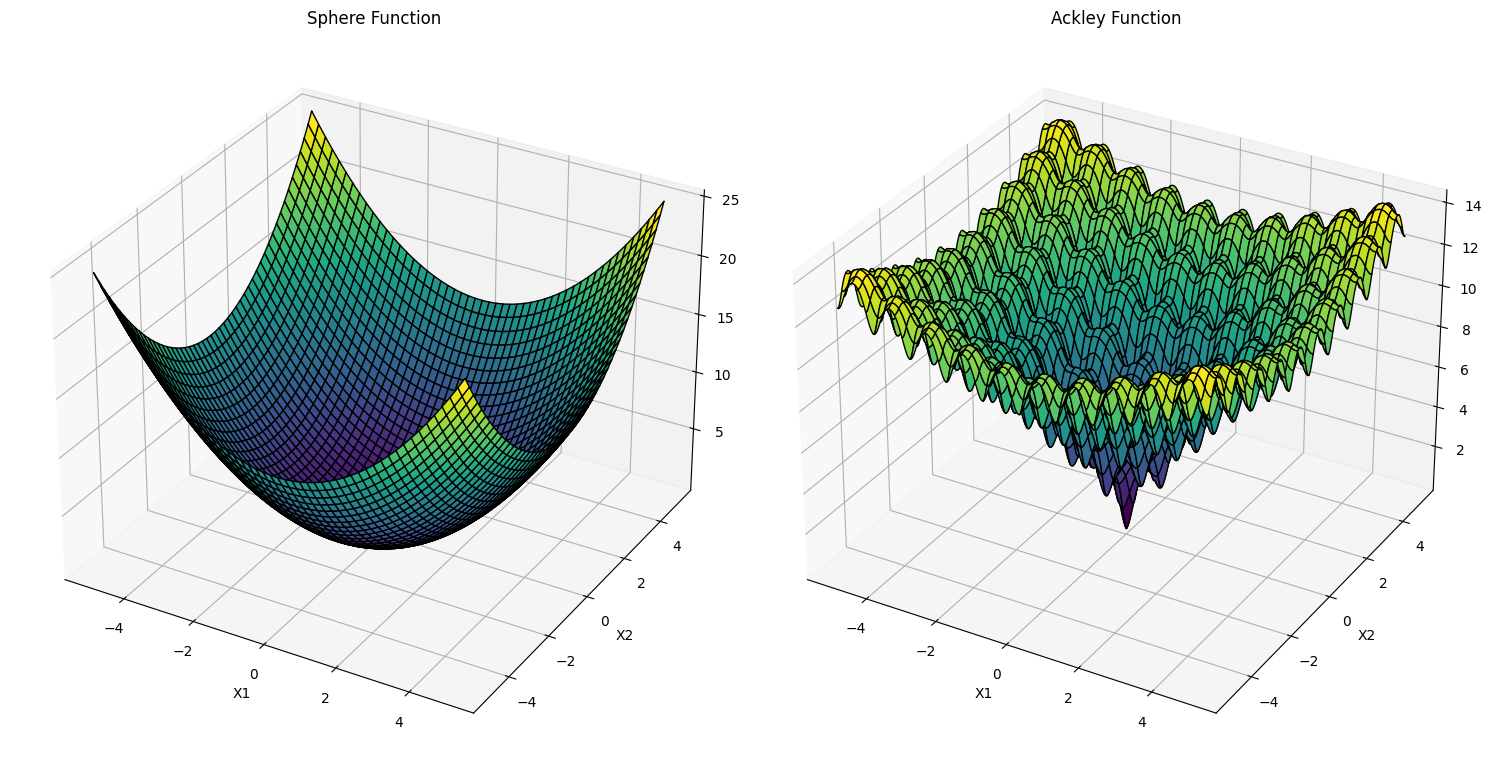

In [ ]:
# Create 3D plot
fig = plt.figure(figsize=(15, 8))

titles = ["Sphere Function", "Ackley Function"]
for idx, z in enumerate([z_unimodal, z_multimodal]):
    # Create sub-plot
    ax = fig.add_subplot(121 + idx, projection="3d")

    # Plot the surface
    ax.plot_surface(X, Y, z, cmap="viridis", edgecolor="k")

    # Set labels
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_title(titles[idx])
    # ax.autoscale(True)

# Show the plot
plt.tight_layout()
plt.show()

---
**Question 1.1 (0-0.2 pt):** Looking at the Sphere and Ackley functions, please discuss the characteristics of these functions and compare their complexity in terms of local and global optima.

**Answer:** The sphere function is a unimodal, convex, smooth function with one global optimum and no local optima. The Ackley function is a multimodal, non-convex, non-smooth function with several local optima and one global optimum.

---
**Question 1.2 (0-0.25-0.5 pt):** Please provide a pseudo-code for your evolutionary algorithm. Please try to be as formal as possible!

**Answer:**
Input:
*   maximum fitness evaluations
*   population size
*   number of dimensions
*   objective function
*   crossover probability
*   mutation rate

1. Initialize the population in array x.
  * number of individuals in x = population_size.
  * length(individual) = number of dimensions.
  * generate random values between the domain range for each individual.
2. For each individual in x.
  * Evaluate the fitness with the objective function.
  * Add the fitness to array f.
  * Calculate the parent selection probability Ps: 1-(fitness / sum(f))
  * Calculate the normalized parent selection probability: Ps / sum(Ps).
3. For individual of x in range(length(x)):
  * Perform roulette wheel parent selection based on individual selection probability P.
  * add the selected parent to array x_parents.
  * add the fitness of the selected parent to array f_parents.
4. For every parent pair, parent[i], parent[i+1] in f_parents:
  * Generate a probabilty Pc
  * If Pc < crossover probability:
    * Stochastically determine a crossover point.
    * Perform crossover at crossover point:
      swap the genes of parent[i] with parent[i+1] to create child[i], child[i+1].
    * Add child[i] to array offspring_x
    * Add child[i+1] to array offspring_x
  * Else:
    * Add parent[i] to array offspring_x
    * Add parent[i+1] to array offspring_x
5. For each individual in x_offspring:
  * for each gene in individual:
    * Generate a probabilty Pc:
    * if Pc < mutation_rate:
      * mutate the gene by adding gaussian noise.
    * else:
      * gene remains the same.
6. For each individual in x_offspring:
  * Evaluate the fitness with the objective function.
  * Add the fitness to array f_offspring.
7. For each (individual, fitness) in (x_offspring, f_offsring):
    * Add the (individual, fitness) to array x_survivors
8. For each (individual, fitness) in (x, f):
    * Add the (individual, fitness) to array x_survivors
9. Rank each (individual, fitness) in x_survivors by fitness.
10. Select the n (n = population_size parameter) best individuals from x_survivors and add them to array x_next_gen.
11. best fitness = fitness of best individual of x_next_gen.
12. x = x_next_gen
13. repeat step 2 to 12 until the maximum number of generations (maximum fitness evaluations/ population size) is reached.
14. Output = best fitness.
13. terminate.








---
**Task 1.1: Implementation of Evolutionary Algrotihm (0-0.65-1.3-1.95-2.6 pt):** Implement an evolutionary algorithm and its components to find the minimum point of a function. Here, domain should be between [-50,50].

In [ ]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.65 pts if the code works but some functions are incorrect and it is badly explained
# 1.3 pts if the code works but some functions are incorrect but it is explained well
# 1.95 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 2.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


#Initialize a population randomly based on the population size and dimensions
def initialization(population_size: int, num_dimensions: int) -> np.ndarray:
    """
    Initialize the starting population with random individuals.
    Each gene of an individual corresponds to a point on a dimension in the function
    """

    ################################################################
    # Generates 2d numpy array where the population size equals the number
    # of rows and the number of dimensions equals the number of columns
    x: np.ndarray = np.random.uniform(low=-50, high=50, size=(population_size, num_dimensions))

    ################################################################

    return x # return population


# Implement the evaluation function that can evaluate all the solutions in a given population.
def evaluation(x: np.ndarray, objective_function: Callable[[np.ndarray], float]) -> np.ndarray:
    """Evaluate the fitness of the population members"""

    ################################################################
    fitness:List[float] = [] # empty list
    # Loops through the population and calculates the objective function for
    # each individual.
    for individual in x:
      fitness_ind: float = objective_function(individual)
      fitness.append(fitness_ind)

    ################################################################
    return np.array(fitness) # returns the list as a numpy array


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def crossover(x_parents: np.ndarray, p_crossover: float) -> np.ndarray:
    """Perform crossover to create offsprings.
    Params:
      """
    ################################################################

    # Create an offpring array
    offspring:List[float] = []

    # generate a probability for every parent pair
    for i in range(0,len(x_parents), 2):
      parent1: np.ndarray = x_parents[i]
      parent2: np.ndarray = x_parents[i+1]

      rand_float: float = random.random()

      # if the probability is lower than p_crossover, crossover will commence
      # else, the parents will be added to the offspring array
      if rand_float < p_crossover:
        # print('Crossover initiated')

        # Sets the max index for the crossover point
        max_cross_point: int = len(x_parents[i])- 1
        # Stochastically determine the crossover point
        cross_point: int = random.randint(1,max_cross_point)

        # seed = random.seed(2)

        # swap the values in the parents' array based on the crossover point
        # to create two children.
        child1:np.ndarray = np.concatenate((parent1[:cross_point], parent2[cross_point:]), axis = 0)
        child2:np.ndarray = np.concatenate((parent2[:cross_point], parent1[cross_point:]), axis = 0)
        # print('Child 1: ',child1)
        # print('Child 2: ',child2)

        # Add the children to the offspring array
        offspring.append(child1)
        offspring.append(child2)
      else:
        # print('Crossover denied')
        offspring.append(parent1)
        offspring.append(parent2)

    offspring:np.ndarray = np.array(offspring)
    ################################################################

    return offspring


# Implement the crossover operator by choosing a suitable method. For inspiration, take a look at the lecture slides
def mutation(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # loops over every individual in the population
    x = x.copy()

    for individual in x:
          # loop over each value in the individual
          for idx, value in enumerate(individual):
            # calculate a random probability
            probability = random.random()

            # print(probability)
            # print(mutation_rate)
            # print(individual)
            # if the probability is lower than the mutation_rate, add gaussian noise
            if probability < mutation_rate:
              value = np.random.normal(value, 0.75)
            # make sure the value remains within th the domain
            value = np.clip(value, -50, 50)
            individual[idx] = value



    ################################################################

    return x


def parent_selection(x: np.ndarray, f: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Select parents for the next generation
    Params:
      x: A 2d np array where each row represents an individual from the current population.
      f: A 2d np array representing the fitness of each individual in the population
    Returns:
      x_parents: A 2d np array where each row represents a parent.
      f_parents: A 2d np array where each row represents the fitness of a parent."""
    ################################################################

    sum_fitness: float = np.sum(f) # The sum of the fitness values
    select_prob: float = 1 - (f / sum_fitness) # The probabilities associated with each entry in x.
    norm_select_prob = select_prob / np.sum(select_prob) # normalized selection probabilities

    num_parents: int = len(x) # The number of parents that will be generated.

    x_parents:List[float] = []
    f_parents:List[float] = []
    # Choose parents based on selection probabilities using roulette wheel selection
    # This line creates a 1d array of indices that match the indices of the individuals in x.
    # The loop repeats for every parent pair, replace is said to false to avoid parents mating with themselves.
    for i in range(0, len(x), 2):
      ind_idx_array: np.ndarray = np.random.choice(a = len(x), size=num_parents, p=norm_select_prob, replace = False) # 1d array
      # print(ind_idx_array)
      # Select parents based on the indices produced by the roulette wheel
      parent1 = list(x[ind_idx_array][0])
      parent2 = list(x[ind_idx_array][1])

      fitness1 = f[ind_idx_array][0]
      fitness2 = f[ind_idx_array][1]

      x_parents.append(parent1)
      x_parents.append(parent2)

      f_parents.append(fitness1)
      f_parents.append(fitness2)


    ####################################
    return np.array(x_parents) , np.array(f_parents)


def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""


    ################################################################
    # create a tuple containing a fitness-indivual pair for the current population
    # append them to the list
    fit_ind_tuple = []
    for i,j in zip(f, x):
      fit_ind_tuple.append((i,list(j)))

    # create a tuple containing a fitness-indivual pair for the offspring population
    # append them to the list
    for i,j in zip(f_offspring, x_offspring):
      fit_ind_tuple.append((i,list(j)))

    # sort the tuples based on the fitness
    fit_ind_tuple = sorted(fit_ind_tuple, key=lambda x: x[0]).copy()
    unique_individuals = []

    # Filter unique indiviuals
    for i in fit_ind_tuple:
      if i not in unique_individuals:
        unique_individuals.append(i)

    # Add the best individuals to the top_contenders list
    top_contenders = unique_individuals[0:len(x)]
    # Extract the individuals and convert to numpy array
    x = np.array([i[1] for i in top_contenders])
    # Extract fitness and convert to numpy array
    f = np.array([i[0] for i in top_contenders])

    ################################################################

    return x, f


def ea(
    # hyperparameters of the algorithm
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,  # mutation rate
    dimensions,  # number of dimensions
    objective_function  # objective function to be minimized
):
    # Calculate the maximum number of generations
    # Maximum number of function evaluations should be the same independent of the population size
    max_generations = int(max_fit_evals / population_size)  # DO NOT CHANGE



    ################################################################
    # Initialize and evaluate the current population
    x = initialization(population_size, dimensions)
    f = evaluation(x, objective_function)


    ################################################################

    # Find the best individual and append to a list to keep track in each generation
    idx = np.argmin(f)
    x_best = [x[idx]]
    f_best = [f[idx]]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Perform the EA steps


        ################################################################
        # Select parents
        x_parents, f_parents = parent_selection(x, f)
        # Perform crossover to create offspring
        x_offspring = crossover(x_parents, p_crossover)
        # Apply mutation to offspring
        x_offspring_mutated = mutation(x_offspring, m_rate)
        # Select next generation
        x, f = survivor_selection(x, f, x_offspring_mutated, evaluation(x_offspring_mutated, objective_function))


        ################################################################


        # Find the best individual in current generation and add to the list
        idx = np.argmin(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best < f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

    return x_best, f_best  # return the best solution and fitness in each generation





# def parent_selection_2(x: np.ndarray, f: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
#     """Select parents for the next generation
#     Params:
#       x: A 2d np array where each row represents an individual from the current population.
#       f: A 2d np array representing the fitness of each individual in the population
#     Returns:
#       x_parents: A 2d np array where each row represents a parent.
#       f_parents: A 2d np array where each row represents the fitness of a parent."""
#     ################################################################

#     sum_fitness: float = np.sum(f) # The sum of the fitness values
#     select_prob: float = f / sum_fitness # The probabilities associated with each entry in x

#     num_parents: int = len(x) # The number of parents that will be generated.

#     # Choose parents based on selection probabilities using roulette wheel selection
#     # This line creates a 1d array of indices that match the indices of the individuals in x.
#     ind_idx_array: np.ndarray = np.random.choice(a = len(x), size=num_parents, p=select_prob) # 1d array

#     # Select parents based on the indices
#     x_parents: np.ndarray = x[ind_idx_array] # 2d array
#     f_parents: np.ndarray = f[ind_idx_array] # 2d array

#     ####################################
#     return x_parents, f_parents




In [ ]:
#######################################################################
########################## Code for testing ###########################

pop = initialization(10, 3) # population
fit = evaluation(pop, Sphere) # evaluation
parents = parent_selection(pop, fit) #parents

# print(f'Population \n {pop}',
#       f'Population Fitness \n {fit}',
#       f'Parents \n {parents[0]}',
#       f'Parent Fitness \n {parents[1]}', sep = '\n\n')

# print(Sphere(pop[2,:]))
# print(Sphere(parents[0][2, :]))


####### Roulette wheel
# seed = random.seed(1)
# select_prob = 1- (fit / np.sum(fit))

# select_prob
# np.sum(fit)
# num_parents: int = 2*len(pop)

# idx = np.random.choice(len(pop), size=num_parents, p=select_prob)
# idx
# print(f'parents: \n', pop[idx])
# empty_list = []
# # print(parents[0][0])
# for i in range(len(parents[0])):
#   empty_list.append(list(parents[0][i]))
# empty_list



###### Crossover
# offspring = []
# p_crossover = 0.5
# for i in range(0,len(parents[0]), 2):
#   parent1 = parents[0][i]
#   parent2 = parents[0][i+1]
#   print(parent1, cross_point)
#   print(parent2, cross_point)
#   rand_float = random.random()
#   print(rand_float)
#   if rand_float < p_crossover:
#     print('Crossover initiated')

#     max_cross_point = len(parents[0][i])- 1
#     cross_point = random.randint(1,max_cross_point)

#     # seed = random.seed(2)


#     child1 = np.concatenate((parent1[:cross_point], parent2[cross_point:]))
#     child2 = np.concatenate((parent2[:cross_point], parent1[cross_point:]))
#     print('Child 1: ',child1)
#     print('Child 2: ',child2)

#     offspring.append(child1)
#     offspring.append(child2)
#   else:
#     print('Crossover denied')
#     offspring.append(parent1)
#     offspring.append(parent2)

# offspring = np.array(offspring)
# print(offspring)

# print(parents[0], parents[1], sep = '\n\n')
crossover(parents[0], 0.8)

##############Mutation#####################
# s = np.random.normal(49, 2)
# if s > 50:
#   s = 50
# elif s < -50:
#   s = -50
# s
# print(parents)

# # loops over every individual in the population
# for individual in parents[0]:
#       # loop over each value in the individual
#       for idx, value in enumerate(individual):
#         # calculate a random probability
#         probability = random.random()
#         # determine the mutation rate for the individual
#         mutation_rate = 1/len(individual)
#         print(probability)
#         print(mutation_rate)
#         print(individual)
#         # if the probability is lower than the individual, add gaussian noise
#         if probability < mutation_rate:
#           value = np.random.normal(value, 0.75)
#         # make sure the value remains within th the domain
#         value = np.clip(value, -50, 50)
#         individual[idx] = value
# print(parents)
# print(parents[0])
# mutation(parents[0], 0.33)



################Survival########################

x = pop
f = fit
x_offspring = crossover(parents[0], 0.8)
f_offspring = evaluation(x_offspring, Sphere)
# # print(x)
# # print(f)
# # print(x_offspring)
# # print(f_offspring)

# # create a tuple containing a fitness-indivual pair for the current population
# # append them to the list

# fit_ind_tuple = []
# for i,j in zip(f, x):
#   fit_ind_tuple.append((i,list(j)))

# # create a tuple containing a fitness-indivual pair for the offspring population
# # append them to the list
# for i,j in zip(f_offspring, x_offspring):
#   fit_ind_tuple.append((i,list(j)))

# # sort the tuples based on the fitness
# fit_ind_tuple = sorted(fit_ind_tuple, key=lambda x: x[0]).copy()
# unique_individuals = []

# # Filter unique indiviuals
# for i in fit_ind_tuple:
#   if i not in unique_individuals:
#     unique_individuals.append(i)

# # Add the best individuals to the top_contenders list
# top_contenders = unique_individuals[0:len(x)]


# print(fit_ind_tuple)
# print(len(fit_ind_tuple))

# print(top_contenders)
# print(len(top_contenders))

# pop_next = np.array([i[1] for i in top_contenders])
# fit_next = np.array([i[0] for i in top_contenders])

# print(pop_next)
# print(fit_next)
# survivor_selection(x, f, x_offspring, f_offspring)

# best_solution, best_fitness = ea( 10, 1000, 0.8, 0.33, 3, Sphere)
# print(best_solution)
# print(best_fitness)


#### Check Your Implementation: Running The Evolutionary Algorithm

Run the cell below, if you implemented everything correctly, you should see
the algorithm running.

In [ ]:
# Dummy parameters
kwargs = {
    "population_size": 20,
    "max_fit_evals": 1000,  # maximum number of fitness evaluations
    "p_crossover": 0.9,  # crossover probability
    "m_rate": 0.1,  # mutation rate
    "dimensions": 10,
    "objective_function": Sphere,
}

# Run the EA
x_best, f_best = ea(**kwargs)

# Print the best individual and its fitness
print("Best solution:", x_best[-1])
print("Best Fitness:", f_best[-1])

# Clear cache
del x_best, f_best, kwargs

Best solution: [ -0.61580268   6.07246055   0.78345681 -18.73539231 -19.5619274
  -3.37729381   4.37945216 -18.28326213  16.75058562  13.45461178]
Best Fitness: 159.80238088561077


**Reults and statistical analysis**

Remember that the EAs are sthocastic algorithms that can produce different results as a result of independent runs.

How do we find overal performance of the algorithm and compare the results?

By running multiple times and performing statitical tests. Therefore, you would need to run your algorithm **20 times** and plot the *average* results.

First, we would need to **defining some helper functions** for finding the average and standard deviations of multiple runs and ploting them. In the next few cells, we give you some pre-made functions for this purpose.

There is no work for you to do, but do look over them and get familiar with how they operate.

In [14]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [13]:
def run_experiment(population_size, p_crossover, m_rate):
    runs = 20  # DO NOT CHANGE - number of runs
    max_fit_evals = 5000  # DO NOT CHANGE

    sphere10D = []
    sphere50D = []
    ackley10D = []
    ackley15D = []

    for _ in range(runs):
        _, f_best_sphere10D = ea(
            population_size[0],
            max_fit_evals,
            p_crossover[0],
            m_rate[0],
            10,
            Sphere,
        )
        _, f_best_sphere50D = ea(
            population_size[1],
            max_fit_evals,
            p_crossover[1],
            m_rate[1],
            50,
            Sphere,
        )
        _, f_best_ackley10D = ea(
            population_size[2],
            max_fit_evals,
            p_crossover[2],
            m_rate[2],
            10,
            Ackley,
        )
        _, f_best_ackley15D = ea(
            population_size[3],
            max_fit_evals,
            p_crossover[3],
            m_rate[3],
            15,
            Ackley,
        )

        sphere10D.append(f_best_sphere10D)
        sphere50D.append(f_best_sphere50D)
        ackley10D.append(f_best_ackley10D)
        ackley15D.append(f_best_ackley15D)

    # find average and std of the runs
    sphere10D_avg, sphere10D_std = calculate_mean_std(sphere10D)
    sphere50D_avg, sphere50D_std = calculate_mean_std(sphere50D)
    ackley10D_avg, ackley10D_std = calculate_mean_std(ackley10D)
    ackley15D_avg, ackley15D_std = calculate_mean_std(ackley15D)

    avgs = [sphere10D_avg, sphere50D_avg, ackley10D_avg, ackley15D_avg]
    stds = [sphere10D_std, sphere50D_std, ackley10D_std, ackley15D_std]
    all_runs = [
        sphere10D,
        sphere50D,
        ackley10D,
        ackley15D,
    ]

    return avgs, stds, all_runs

In [12]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

#### Running The Experiments

In the following cell we run the EA over several different hyper-parameter values.

In [ ]:
population_size = [50, 50, 50, 50]  # DO NOT CHANGE
p_crossover = [0.8, 0.8, 0.8, 0.8]  # DO NOT CHANGE
m_rate = [0.1, 0.1, 0.1, 0.1]  # DO NOT CHANGE

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment(
    population_size, p_crossover, m_rate
)

#### Plotting The Results

In the following cell we plot the results of the experiments.

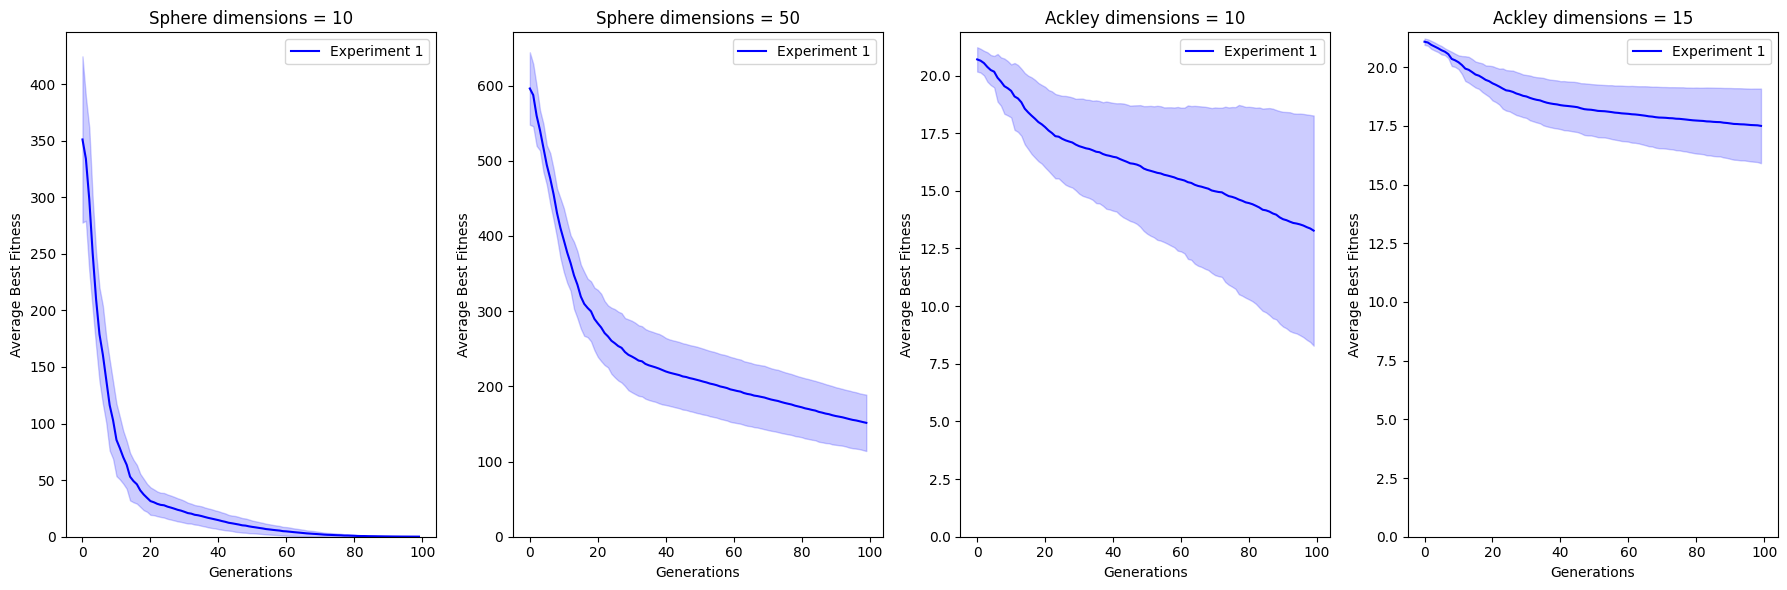

In [ ]:
labels = [  # DO NOT CHANGE
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=4,
    n_queens=None,
)

---

**Question 1.3 (0-0.25-0.5 pt):** Describe the results that you see in the line graphs. How is the performance of the EA on Sphere and Ackley functions? How the results are different between functions and dimensions? What causes these differences?

**Answer:** The Sphere function is a convex function without any local optima. With lower dimensions the search space is less complex, which allows the algorithm to converge to the optimal solution relatively easy. When the dimensionality of the Sphere function increases, the search space also increases in complexity, which makes converging to an optimum value more challenging. The algorithm still performs reasonably well due to the Sphere function's relatively simple features.

The Ackley function on the other hand, has a more complex search space with many local optima, thus making it more difficult to efficiently converge to the global optimum. Especially in this case it is crucial to emphasize exploration, which means introducing more variety in the population, by increasing the population size, crossover probabilty and mutation rate. This could improve the probability of escaping local optima in favor of better solutions. Here, even more so than the Sphere function, higher number of dimensions will increase the complexity, which results in more difficulty converging to an optimal solution.

In summary, for the optimal performance of both functions it is crucial to strike a balance between exploration and exploitation.

---
**Improve Your Results**

Experiment with the hyperparameters of the algorithm and find a set of parameters that can perform better than the previous results. Compare the results using statistical test and find a settings where there is a statistically significant improvement.

You can adjust the *population size*, *crossover probability* and *mutation rate* to find the settings that can work statistically better relative to the previous results. Please look at the "ADJUST THESE VALUES" part to experiment and improve your solutions.

Optionally, you can also improve your algorithm by implementing/changing strategies used

In [ ]:
# Grading (bonus points):
# 0.4 pts bonus for the optional improvement: if you implement different strategy, it works and produces significantly better results
# Different strategy could be a different implementation of the mutation/crossover/parent or survival selection mechanisms


# Implement your strategy here and integrate with the Evolutionary Algorithm



    ################################################################

##################

In [ ]:
################################################################

population_size = [  # ADJUST THESE VALUES
    150,
    150,
    150,
    250,
]
p_crossover = [  # ADJUST THESE VALUES
    0.8,
    0.8,
    0.95,
    0.95,
]
m_rate = [  # ADJUST THESE VALUES
    0.25,
    0.75,
    0.95,
    0.75,
]


# raise NotImplementedError
# Remove the line above once you've made the changes you want

################################################################

**Running the experiment again**

In [ ]:
avgs_experiment_2, stds_experiment_2, all_runs_experiment_2 = run_experiment(
    population_size, p_crossover, m_rate
)

**Plotting the new and previous results**

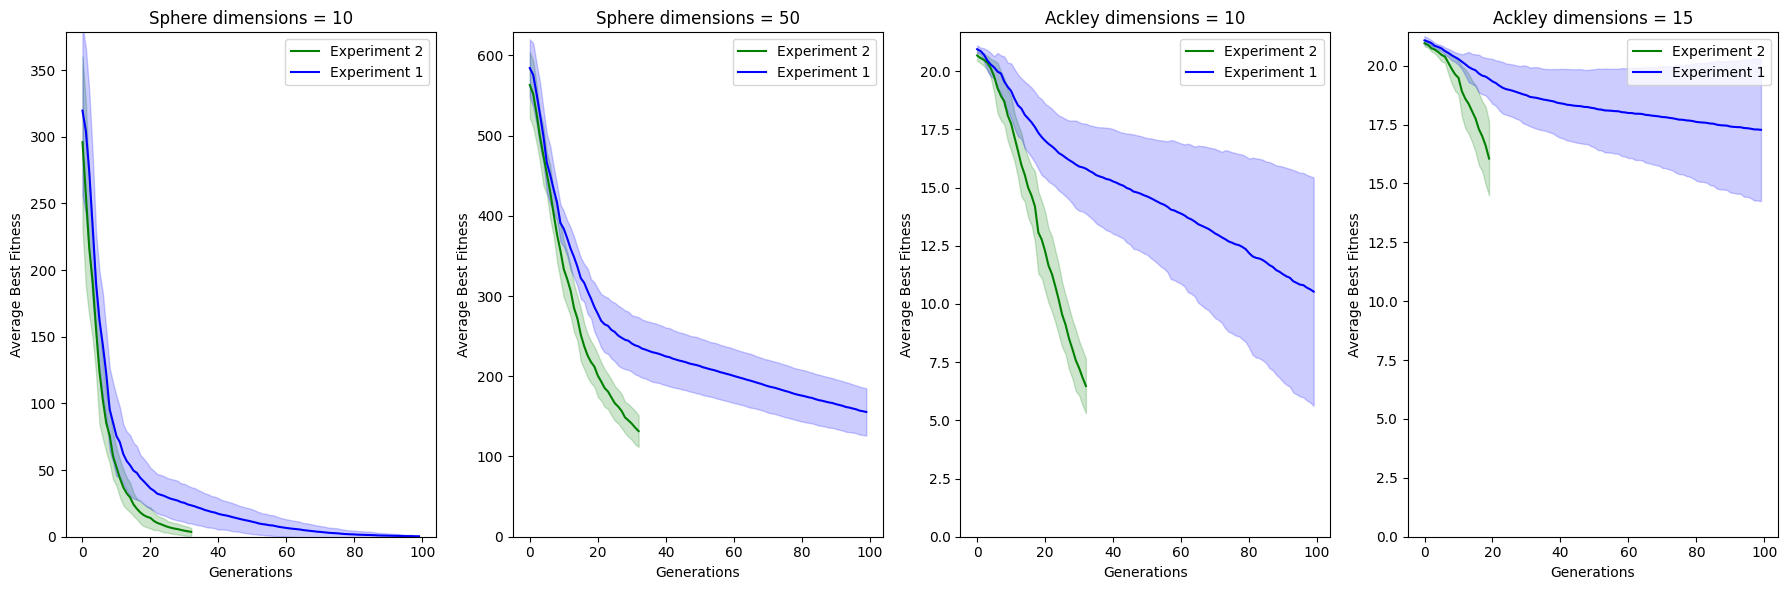

In [ ]:
labels = [
    "Sphere dimensions = 10",
    "Sphere dimensions = 50",
    "Ackley dimensions = 10",
    "Ackley dimensions = 15",
]  # DO NOT CHANGE

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=avgs_experiment_2,
    stds_experiment_2=stds_experiment_2,
    n_columns=4,
    n_queens=None,
)

**Measuring the statistical significance of differences of two sets of experiment results**

The final step is to calculate whether the results from your set of hyperparameters (experiment 2) resulted in significantly better results.

To do this, we will perform a statistical test know as [rank-sum test](https://www.wikiwand.com/en/Mann%E2%80%93Whitney_U_test).

You will calculate the rank-sum for the results of the first and second experiments.

In [ ]:
alpha = 0.05

# this loops over the 4 different functions we have
#   (Sphere dimensions = 10, Sphere dimensions =50, Ackley dimensions = 10, Ackley dimensions = 15)
labels = [
    "Sphere function 10 dimensions:",
    "Sphere function 50 dimensions:",
    "Ackley function 10 dimensions:",
    "Ackley function 15 dimensions:",
]
for i in range(4):
    runs_exp_1 = all_runs_experiment_1[i]
    runs_exp_2 = all_runs_experiment_2[i]

    best_per_run_exp_1 = [sublist[-1] for sublist in runs_exp_1]
    best_per_run_exp_2 = [sublist[-1] for sublist in runs_exp_2]

    t_statistic, p_value = ranksums(best_per_run_exp_1, best_per_run_exp_2)
    if p_value < alpha:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ",significant difference.",
        )
        # else:
        #    print(labels[i], "significant difference. Experiment 2 is better.")
    else:
        # if np.mean(best_per_run_exp_1) < np.mean(best_per_run_exp_2):
        print(
            labels[i],
            "Experiment 1 average:",
            np.mean(best_per_run_exp_1),
            ", Experiment 2 average:",
            np.mean(best_per_run_exp_2),
            ",no significant difference.",
        )
        # else:
        #    print(labels[i], "no significant difference. Experiment 2 is better.")

Sphere function 10 dimensions: Experiment 1 average: 0.3003979276136146 , Experiment 2 average: 3.642723612376898 ,significant difference.
Sphere function 50 dimensions: Experiment 1 average: 155.4902810813017 , Experiment 2 average: 131.6423367937341 ,significant difference.
Ackley function 10 dimensions: Experiment 1 average: 10.530526545884944 , Experiment 2 average: 6.472164810100321 ,significant difference.
Ackley function 15 dimensions: Experiment 1 average: 17.279800496200437 , Experiment 2 average: 16.06003736957076 ,significant difference.


---
**Question 1.4 (0-0.3-0.6-0.9-1.2 pt):** Please improve the results significantly in each case (i.e. on Sphere and Ackley functions with 10, 50 and 10, 15 dimensions respectively) and discuss what kinds of changes you had to do to achieve this improvement. Please provide your reasoning why the new parameter settings worked better.

Grading:

0 pts: No answer or non of the cases were improved.

0.3 pts: At least one of the cases improved significantly but reasons why were not clearly explained.

0.6 pts: One or two cases improved significantly and the reasons why were somewhat clear.

0.9 pts: Three to four cases improved significanlty and the reasons why are clear.

1.2 pts: All of the cases improved significanlty and the reasons why are clear.


**Answer:** By experimenting with higher values for the population size, crossover probability and mutation rate it was possible to achieve significant improvements in the performance of the algorithm when compared to experiment 1.
The Aim was to improve exploration by introducing more diversity within the population, which resulted in more diverse solutions. This prevented the algorithm from converging to a suboptimal solution early, which ultimately led to better results.

---
## Part 2: Discrete Optimization (The N-Queens Problem, 5 points total)

Implement an Evolutionary Algorithm for the **n-queens problem**.
Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

We would like to implement an EA that can find a solution for any given N by N board but in this case it is required to place N queens where none of them attack each other.

You may use the implementation of the EA you used for solving continuous problems in Part 1. But remember, this is a discere problem so you would need to think about how to represent the solutions and search using the evolutionary operators.

Consider, what changes you would need to do!


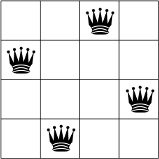


It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

**Question 2.1 (0-0.3 pt):** How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** A good way to represent this problem is by creating an array with the length of the number of rows, and each value represents a column from 1st column to the length of the columns. In this case that would mean that each gene is a permutation of the numbers 1 to 4 (represnting each column)in an array of length 4 (representing each row).

Source: Eiben, A.E., & Smith, J.E. (Year). Introduction to Evolutionary Computing (2nd ed.).

**Question 2.2 (0-0.2 pt)**: Please write down an example representation and discuss what it means.

**Answer:** An example representation would be [1,1,2,4]. This means that the following squares on the board are occupied by a queen: (row 1, column 1), (row 2, column 1), (row 3 , column 2), (row 4 , column 4).

**Question 2.3 (0-0.2 pt):** How many possible solutions can be generated in your representation?

**Answer:** The total number of solutions is 4!, seeing as no queen can share the same row and there are 4 queens that can be placed in 4 columns. This results in 4 x 3 x 2 x 1 = 24 = 4!.

---
**Task 2.1 (0-0.20-0.40-0.80):** Implementation of solution encoding, visualization and evaluation functions.

In [10]:
################################################################



example_solution = [1,1,2,4]


################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells.




In [8]:
def visualize_solution(solution: np.ndarray) -> List[str]:
    """Visualize the placement of queens on the chessboard."""

    ################################################################

    visual_solution = []
    # loops over the solution and creates a row for each index.
    # and adds a Q to the right column.
    for index, column in enumerate(solution):
      row = ['.' for _ in range(len(solution))]
      row[column -1] = 'Q'
      visual_solution.append(row)

    # prints the solution as a matrix
    for row in visual_solution:
        print(' '.join(row))

    ################################################################
# solution = np.array([1,3,2,4])
# visualize_solution(solution)



Write the evaluation function to assess how good your solution is.

In [7]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of an solution."""
    ################################################################

    attacks:int = 0

    for i in range(len(solution)):
      for j in range(i+1, len(solution)):

        # checks if the queens are placed on each others diagonals
        # by comparing the distance of the columns with the distance of the rows
        # if these are equal the queens are placed on each others diagonal.
        if abs(solution[i] - solution[j]) == abs(i - j):
          attacks += 1

        # checks if the queens are placed on the same columns
        elif solution[i] == solution[j]:
          attacks += 1
    # Computes the fitness by taking the inverse of the number of attacks.
    # Adds 1 to avoid division by zero
    fitness = 1 / (1 + attacks)

    ################################################################

    return fitness

# evaluate_solution_n_queens(solution)





Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [34]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [1, 1, 2, 4]
Phenotype (solution visualization):
Q . . .
Q . . .
. Q . .
. . . Q
Solution fitness 0.25


---

**Task 2.2 (0-0.4-0.8-1.2-1.6 pt):** Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [1]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


#initialize a population of solutions for the N queens problem where num_dims = N
def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################
    # create empty array x
    x = []
    # Creates solutions in a loop and appends them to x.
    for i in range(population_size):
        individual = random.sample(range(1, num_of_dims + 1), num_of_dims)
        x.append(individual)

    x = np.array(x)
    ################################################################

    return x #return population


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################
    # Create an offpring array
    offspring:List[float] = []

    # generate a probability for every parent pair
    for i in range(0,len(x_parents), 2):
      parent1: np.ndarray = x_parents[i]
      parent2: np.ndarray = x_parents[i+1]

      rand_float: float = random.random()

      # if the probability is lower than p_crossover, crossover will commence
      # else, the parents will be added to the offspring array
      if rand_float < p_crossover:
        # print('Crossover initiated')

        # Sets the max index for the crossover point
        max_cross_point: int = len(x_parents[i])- 1
        # Stochastically determine the crossover point
        cross_point: int = random.randint(1,max_cross_point)

        # seed = random.seed(2)

        # swap the values in the parents' array based on the crossover point
        # to create two children.
        child1:np.ndarray = np.concatenate((parent1[:cross_point], parent2[cross_point:]), axis = 0)
        child2:np.ndarray = np.concatenate((parent2[:cross_point], parent1[cross_point:]), axis = 0)
        # print('Child 1: ',child1)
        # print('Child 2: ',child2)

        # Add the children to the offspring array
        offspring.append(child1)
        offspring.append(child2)
      else:
        # print('Crossover denied')
        offspring.append(parent1)
        offspring.append(parent2)

    offspring:np.ndarray = np.array(offspring)
    ################################################################

    return offspring



def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # loops over every individual in the population
    x = x.copy()

    for individual in x:
          # loop over each value in the individual
          for idx, value in enumerate(individual):
            # calculate a random probability
            probability = random.random()

            # loop through values of an individual
            # if the probability is lower than the mutation_rate, change the value
            if probability < mutation_rate:
              value = random.randint(1,len(individual))
            individual[idx] = value
    ################################################################

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation"""

    ################################################################
    sum_fitness: float = np.sum(f) # The sum of the fitness values
    select_prob: float = f / sum_fitness # The probabilities associated with each entry in x.

    num_parents: int = len(x) # The number of parents that will be generated.

    x_parents:List[float] = []
    f_parents:List[float] = []

    # Choose parents based on selection probabilities using roulette wheel selection
    # The loop repeats for every parent pair, replace is set to false to avoid parents mating with themselves
    for i in range(0, len(x), 2):
      # This line creates a 1d array of indices that match the indices of the individuals in x.
      ind_idx_array: np.ndarray = np.random.choice(a = len(x), size=num_parents, p=select_prob, replace = False) # 1d array
      # print(ind_idx_array)

      # Select parents based on the indices
      parent1 = list(x[ind_idx_array][0])
      parent2 = list(x[ind_idx_array][1])

      # Select fitness based on the indices
      fitness1 = f[ind_idx_array[0]]
      fitness2 = f[ind_idx_array[1]]
      # add the individuals to the parent array
      x_parents.append(parent1)
      x_parents.append(parent2)
      # add the fitness to the fitness array
      f_parents.append(fitness1)
      f_parents.append(fitness2)



    ####################################
    return x_parents, f_parents


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""


    ################################################################

    # create a tuple containing a fitness-indivual pair for the current population
    # append them to the list
    fit_ind_tuple = []
    for i,j in zip(f, x):
      fit_ind_tuple.append((i,list(j)))

    # create a tuple containing a fitness-indivual pair for the offspring population
    # append them to the list
    for i,j in zip(f_offspring, x_offspring):
      fit_ind_tuple.append((i,list(j)))

    # sort the tuples based on the fitness
    fit_ind_tuple = sorted(fit_ind_tuple, key=lambda x: x[0], reverse = True).copy()
    unique_individuals = []

    # Filter unique indiviuals
    for i in fit_ind_tuple:
      if i not in unique_individuals:
        unique_individuals.append(i)

    # Add the best individuals to the top_contenders list
    top_contenders = unique_individuals[0:len(x)]
    # Extract the individuals and convert to numpy array
    x = np.array([i[1] for i in top_contenders])
    # Extract fitness and convert to numpy array
    f = np.array([i[0] for i in top_contenders])

    ################################################################

    return x, f




def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    #########################
    x = initialization_n_queens(population_size, num_of_dims)
    f = evaluation_n_queens(x)

    #########################

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for _ in range(max_generations - 1):

        #########################
        # generate parents with associated fitness
        x_parents, f_parents = parent_selection_n_queens(x, f)
        # generate offspring
        x_offspring = crossover_n_queens(x_parents, p_crossover)
        # calculate fitness offspring
        f_offspring = evaluation_n_queens(x_offspring)
        # generate mutated offspring
        x_mutated_offspring = mutation_n_queens(x_offspring, m_rate)
        # calculate fitness mutated offspring
        f_mutated_offspring = evaluation_n_queens(x_mutated_offspring)
        # generate next generation with associated fitness
        x, f = survivor_selection_n_queens(x, f, x_mutated_offspring, f_mutated_offspring)

        #########################

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

        # Append the best individual to the list
        f_best.append(fi_best)
        x_best.append(xi_best)
    return x_best, f_best

In [ ]:
######################Code for testing#######################
# pop_queens = initialization_n_queens(10, 4)
# print(pop_queens)

# fitness_pop_queens = evaluation_n_queens(pop_queens)
# print(fitness_pop_queens)

# x_parents, f_parents = parent_selection_n_queens(pop_queens, fitness_pop_queens)
# x_offspring = crossover_n_queens(x_parents, 0.8)
# f_offspring = evaluation_n_queens(x_offspring)
# print(x_offspring, f_offspring)

# x_mutated_offspring = mutation_n_queens(x_offspring, 0.25)
# f_mutated_offspring = evaluation_n_queens(x_mutated_offspring)
# print(x_mutated_offspring, f_mutated_offspring)

# x_next_gen, f_next_gen = survivor_selection_n_queens(pop_queens, fitness_pop_queens, x_mutated_offspring, f_mutated_offspring)
# print(x_next_gen, f_next_gen)

####################### ROULETTE WHEEL #########################
# sum_fitness: float = np.sum(fitness_pop_queens) # The sum of the fitness values
# select_prob: float = fitness_pop_queens / sum_fitness # The probabilities associated with each entry in x.

# select_prob.sum, fitness_pop_queens

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.


In [ ]:
print("Case when N=8:")

x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=8:
Best fitness: 1.0
Best solution found:
. . . Q . . . .
. Q . . . . . .
. . . . . . . Q
. . . . Q . . .
. . . . . . Q .
Q . . . . . . .
. . Q . . . . .
. . . . . Q . .


In [ ]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(200, 100000, 0.9, 0.2, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
Best fitness: 1.0
Best solution found:
. . . . . . . . Q . . . . . . .
. . . . . . . . . . . Q . . . .
. . Q . . . . . . . . . . . . .
. . . . . . . . . . Q . . . . .
. Q . . . . . . . . . . . . . .
. . . . . . Q . . . . . . . . .
Q . . . . . . . . . . . . . . .
. . . Q . . . . . . . . . . . .
. . . . . . . . . . . . . Q . .
. . . . . . . Q . . . . . . . .
. . . . . . . . . . . . . . Q .
. . . . Q . . . . . . . . . . .
. . . . . . . . . . . . . . . Q
. . . . . . . . . . . . Q . . .
. . . . . . . . . Q . . . . . .
. . . . . Q . . . . . . . . . .


In [ ]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 100000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=32:
Best fitness: 1.0
Best solution found:
. . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . .
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . .
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . .
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . .
. . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . .
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q .
. . . . . . . . . . . Q . . . . . . . . . . . . .

---

**Question 2.4 (0-0.2-0.4-0.6-1-1.5 pt):** Describe the results. What was the fitness found for each case? Were you able to find fitness scores of 8, 16 and 32 for N=8, 16 and 32 cases? How did you find them? Did you try improving the results by testing different parameters and/or evolutionary operators?

Grading:

0 pts: no solution or visualization provided.

0.2 pts: Solutions and visualizations were provided, no insights provided how the results achieved.

0.4 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, limited/no insights provided on how this result is achieved.

0.6 pts: Solutions and visualizations were provided, at least for N=8, a optimum solution was found, insights on how this result is achieved provided.

1 pts: Solutions and visualizations were provided, for N=8 and N=16, optimum solutions were found, insights on how this result is achieved provided.

1.5 pts: Solutions and visualizations were provided, for N=8, N=16 and N=32, optimum solutions were found, insights on how this result is achieved provided.

**Answer:** For N = 8 (original_params: 100, 10000, 0.5, 0.1, 8) and N = 16 (original_params: 200, 100000, 0.9, 0.2, 16) no paramaters where changed. For N = 32 (original_params: 100, 10000, 0.5, 0.1, 32) however, finding the optimal parameters presented a challenge.

First, i ran the experiment N=32 with  the original parameters which only resulted in a fitness of 0.1 as best solution. Then, i tried increasing the population to 250, crossover probability to 0.9 and mutation rate to 0.5 (params_2nd_run: 250, 100000, 0.9,  0.5, 32). This only yielded a best fitness of 0.1 however. It is possible that this dissapointing result could be attributed to the fact that changing one value in a solution could have a significant impact on the fitness of that solution. For the third run I tried the following parameters (params_3rd_run: 250, 100000, 0.5, 0.1, 32). I figured that reducing the crossover probability and mutation rate to their former values and keeping the population size high might strike a good balance between exploration and exploitation. The results only slightly improved to a best fitness of 0.25. Finally, i converted all the paramters to their former values except for the maximum fitness evaluations, which remained 100000 (params_4th_run, 100, 100000, 0.5, 0.1, 32), and these parameters led to an optimum fitness of 1.0.

This experiment shows that the search space for the N-queens problem becomes significantly more complex as the number of queens increases. Where the algorithm seems more forgiving with lower dimensions, seeing as there was no need for additional tuning to acquire an optimal results, it becomes harder to optimize for larger dimensions as demonstrated by this experiment. In this case reducing variability in solutions and giving the algorithm enough time to converge to an optimum value was key for a good result.



---

#### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm similar to Part 1. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [2]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):
    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.

    max_fit_evals = 10000

    fitness_8 = []
    fitness_16 = []
    fitness_32 = []

    runs = 10

    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [15]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


N = 8: 1.0
N = 16: 0.5999999999999999
N = 32: 0.13785714285714284


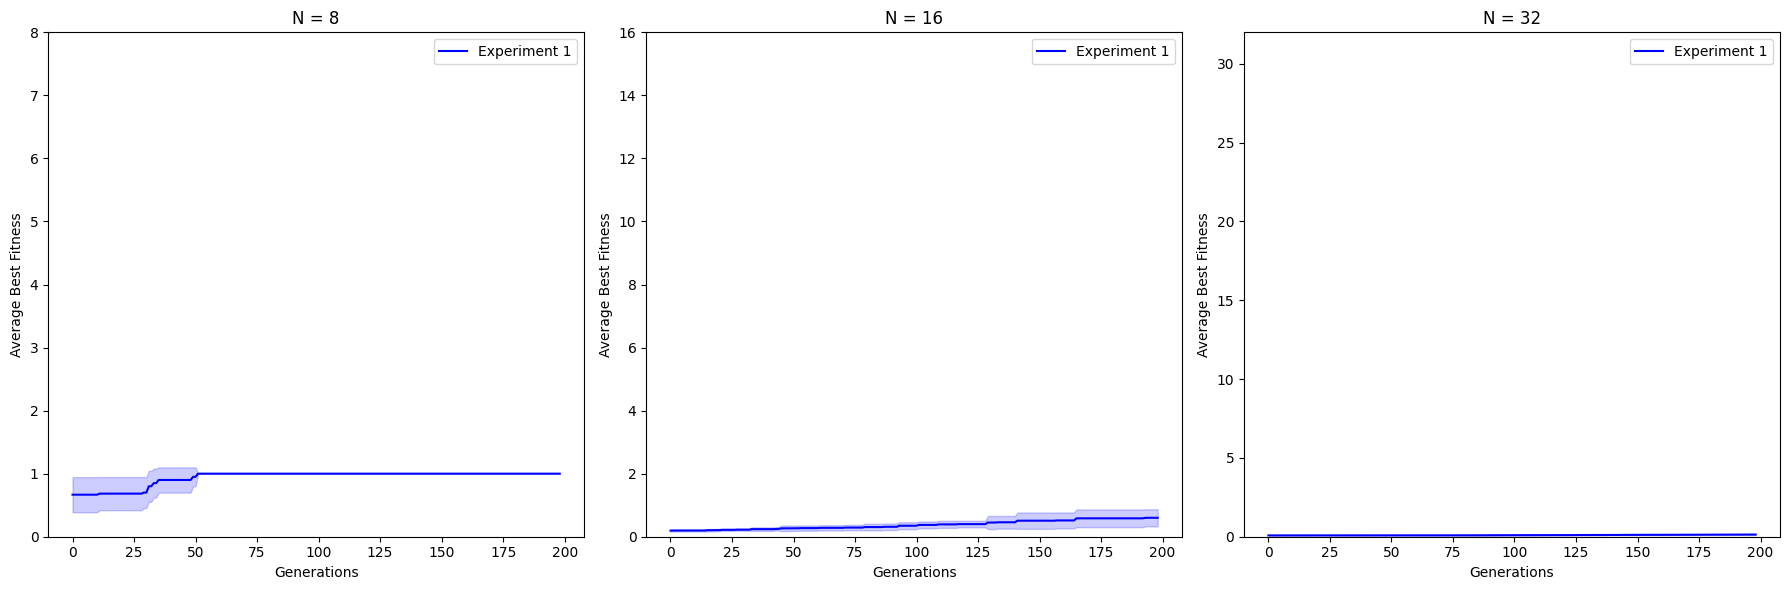

In [33]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)
print(f'N = 8: {avgs_experiment_1[0][-1]}',
      f'N = 16: {avgs_experiment_1[1][-1]}',
      f'N = 32: {avgs_experiment_1[2][-1]}',
      sep = '\n')

**Question 2.5 (0-0.2-0.4 pt)** Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: The maximum average fitness for N = 8, N = 16 and N = 32 is 1.00, 0.60 and 0.14 respectively. The most notable difference between the problem cases is the speed at which the algorithm converges to a maximum fitness. This discrepancy is likely due to fact that as N increases, the search space increases in complexity as well. Consequently, the fitness of each generations will improve by smaller increments. As a result, the algorithm will need to evaluate more generations before converging to an optimal fitness.

